In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [30]:
df = pd.read_csv('distributions/YOLOv9e_data_distribution.csv')
df.head()

,predicted_label,predicted_class_id,ground_truth_label,ground_truth_class_id,confidence,is_detected
0,person,0,person,0,0.947552,True
1,person,0,person,0,0.965578,True
2,person,0,person,0,0.844935,True
3,person,0,person,0,0.941579,True
4,person,0,person,0,0.944374,True


### Noncomformity Distribution

In [45]:
df1 = df[df['confidence'] != 0] # predict exist = confidence is not 0
df1 = df1.sample(n=2000, random_state=1)
len(df1)

2000

In [58]:
def get_nonconformity_scores(data):
    nc_scores = []
    confs = data['confidence'].to_numpy()
    preds = data['predicted_class_id'].to_numpy()
    truth = data['ground_truth_class_id'].to_numpy()
    for i in range(len(confs)):
        if preds[i] == truth[i]:
            nc_scores.append(1 - confs[i])
        else:
            nc_scores.append(confs[i])
    return nc_scores

df1['nc_scores'] = get_nonconformity_scores(df1)
df1.head(10)

,predicted_label,predicted_class_id,ground_truth_label,ground_truth_class_id,confidence,is_detected,nc_scores
127882,traffic light,9,traffic light,9,0.582983,True,0.417017
29798,airplane,4,airplane,4,0.857095,True,0.142905
57266,boat,8,boat,8,0.453117,True,0.546883
99697,chair,56,chair,56,0.931253,True,0.068747
71919,bench,13,bench,13,0.697066,True,0.302934
8380,person,0,chair,56,0.951522,True,0.951522
345,person,0,person,0,0.942334,True,0.057666
128264,traffic light,9,traffic light,9,0.956123,True,0.043877
114235,cell phone,67,cell phone,67,0.910382,True,0.089618
15230,car,2,car,2,0.664235,True,0.335765


(-0.02, 1.0)

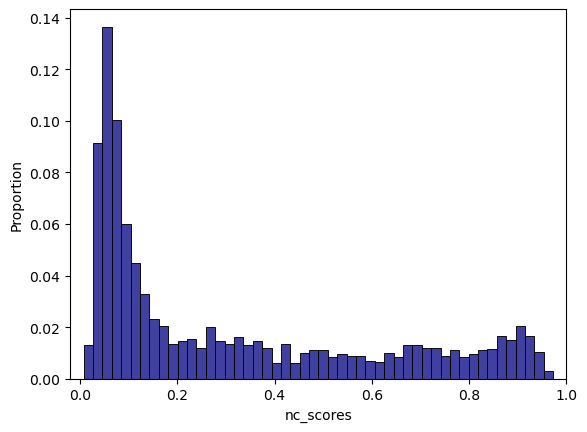

In [61]:
ax = sns.histplot(data=df1, x="nc_scores", stat='proportion', bins=50, color='navy')
ax.set_xlim(-0.02, 1)

### Guarantee Probability of Correct Predictions: P[object actually exist | predict exist]

In [72]:
def estimate_existence_guarantee(confidence_score, data, col_name):
    s = data[col_name]
    total = len(s)
    count = 0
    for i in s:
        if i < confidence_score:
            count += 1
    print('The probability of the predicted object actually exists is ' + str(count/total))
    return count/total

def estimate_nonexistence_guarantee(confidence_score, data, col_name):
    s = data[col_name]
    total = len(s)
    count = 0
    for i in s:
        if i < confidence_score:
            count += 1
    print('The probability of the predicted object actually does not exist is ' + str(1 - count/total))
    return 1 - count/total

def calibration_function(confidence, data, col_name = 'nc_scores'):
    if confidence >= 0.5:
        calibrated_score = estimate_existence_guarantee(confidence, data, col_name)
    else:
        calibrated_score = estimate_nonexistence_guarantee(confidence, data, col_name)
    return calibrated_score

testing_confidence = 0.67
calibration_function(testing_confidence, df1)

The probability of the predicted object actually exists is 0.811


0.811